In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Sales_Data.xlsx')

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,43155,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,43227,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,43282,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,43337,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,43401,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [4]:
print("Total records (rows) in the dataset : {}".format(df.shape[0]))
print("Total columns (features) in the dataset : {}".format(df.shape[1]))

Total records (rows) in the dataset : 2747
Total columns (features) in the dataset : 20


In [5]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [6]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP
count,2747.0,2747.0,2747.0,2747.0,2747.0,2747.0,2747.0,2747.0
mean,10259.8,35.1,101.1,6.5,3553.0,43598.9,1757.1,100.7
std,91.9,9.8,42.0,4.2,1839.0,230.2,819.3,40.1
min,10100.0,6.0,26.9,1.0,482.1,43106.0,42.0,33.0
25%,10181.0,27.0,68.7,3.0,2204.3,43412.0,1077.0,68.0
50%,10264.0,35.0,95.5,6.0,3184.8,43640.0,1761.0,99.0
75%,10334.5,43.0,127.1,9.0,4503.1,43786.0,2436.5,124.0
max,10425.0,97.0,252.9,18.0,14082.8,43982.0,3562.0,214.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   int64  
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [8]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [9]:
df_dedupped = df.drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(df_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(df.shape[0]))

Number of records after removing customer_id (pk), duplicates : 2747
Number of records in original dataset : 2747


In [10]:
# Assuming df is your DataFrame
rfm_df = df.groupby('CUSTOMERNAME').agg({
    'DAYS_SINCE_LASTORDER': 'min',
    'ORDERNUMBER': pd.Series.nunique,
    'SALES': 'sum'
}).reset_index()

# Renaming the columns for clarity
rfm_df.rename(columns={
    'DAYS_SINCE_LASTORDER': 'Recency',
    'ORDERNUMBER': 'Frequency',
    'SALES': 'Monetary'
}, inplace=True)



In [11]:
rfm_df

,CUSTOMERNAME,Recency,Frequency,Monetary
0,"AV Stores, Co.",421,3,157807.8
1,Alpha Cognac,675,3,70488.4
2,Amica Models & Co.,328,2,94117.3
3,"Anna's Decorations, Ltd",131,4,153996.1
4,Atelier graphique,312,3,24180.0
...,...,...,...,...
84,"Vida Sport, Ltd",440,2,117713.6
85,Vitachrome Inc.,432,3,88041.3
86,"Volvo Model Replicas, Co",338,4,75754.9
87,West Coast Collectables Co.,523,2,46084.6


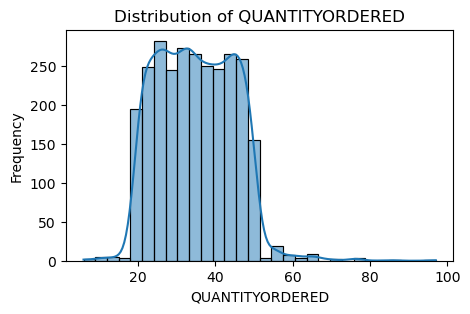

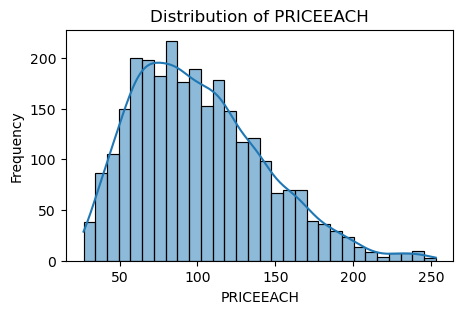

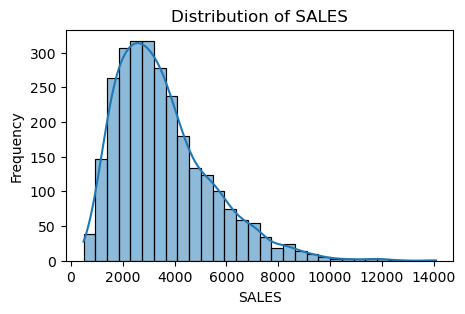

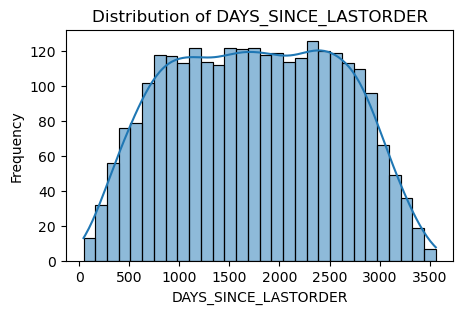

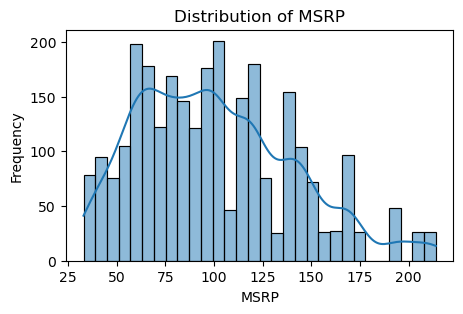

In [12]:
# List of numeric columns
numeric_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP']

# Plot histograms
for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

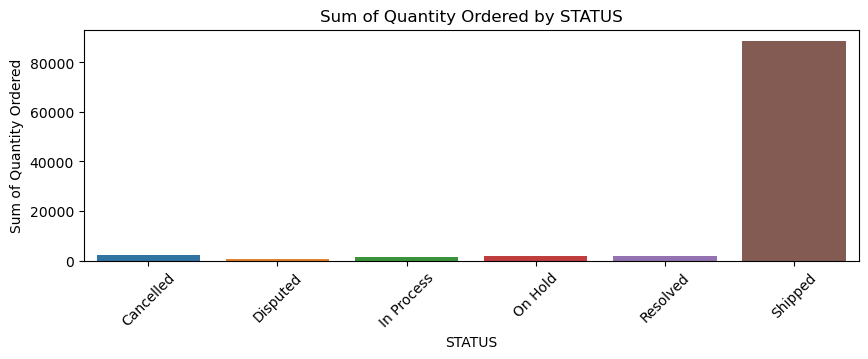

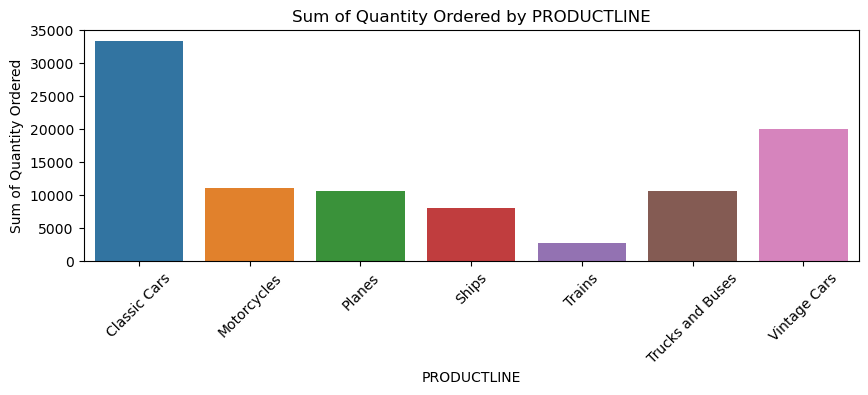

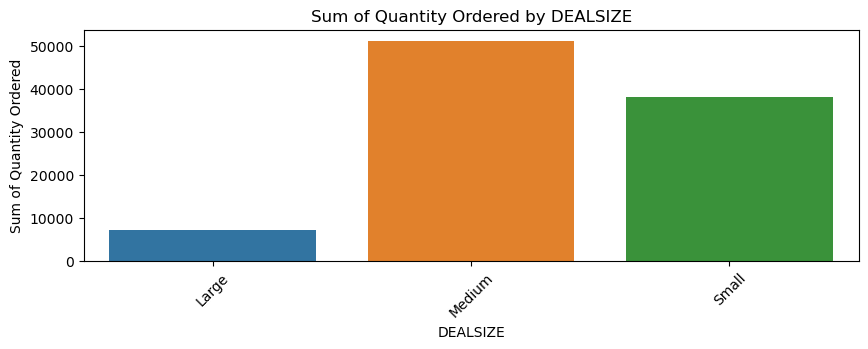

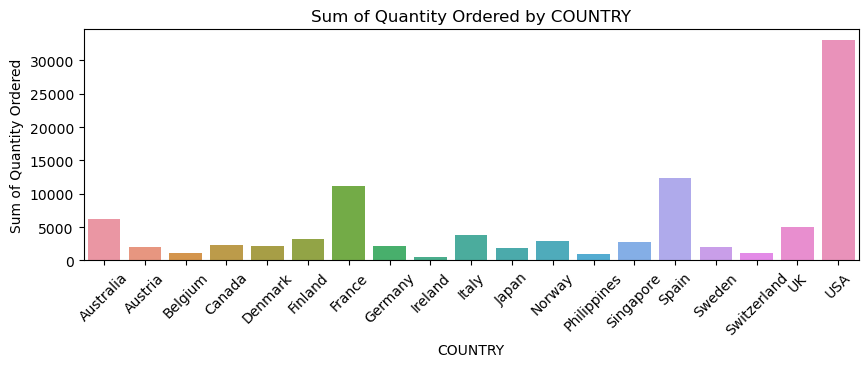

In [13]:
# List of categorical columns
categorical_cols = ['STATUS', 'PRODUCTLINE', 'DEALSIZE', 'COUNTRY']

for col in categorical_cols:
    plt.figure(figsize=(10, 3))
    quantity_ordered_sum = df.groupby(col)['QUANTITYORDERED'].sum().reset_index()
    sns.barplot(data=quantity_ordered_sum, x=col, y='QUANTITYORDERED', order=quantity_ordered_sum[col])
    plt.title(f'Sum of Quantity Ordered by {col}')
    plt.xlabel(col)
    plt.ylabel('Sum of Quantity Ordered')
    plt.xticks(rotation=45)
    plt.show()

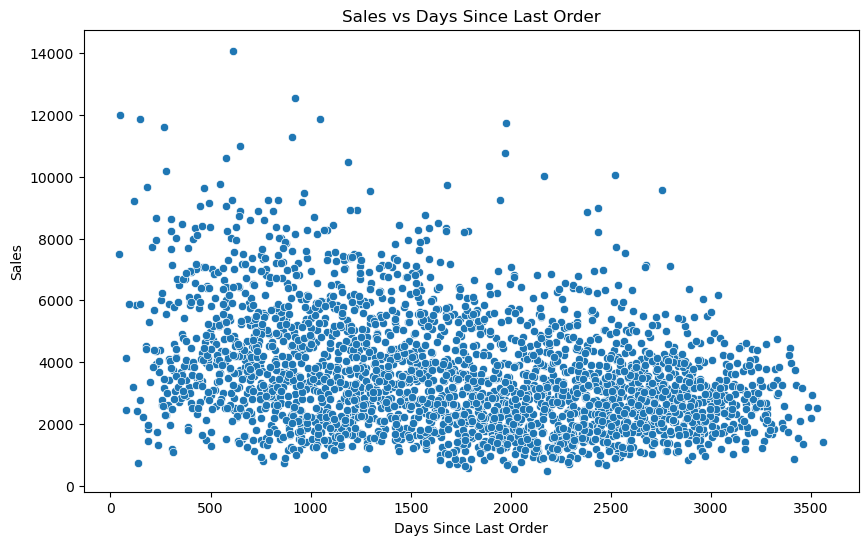

In [14]:
# Scatter plot for SALES vs DAYS_SINCE_LASTORDER
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='DAYS_SINCE_LASTORDER', y='SALES')
plt.title('Sales vs Days Since Last Order')
plt.xlabel('Days Since Last Order')
plt.ylabel('Sales')
plt.show()

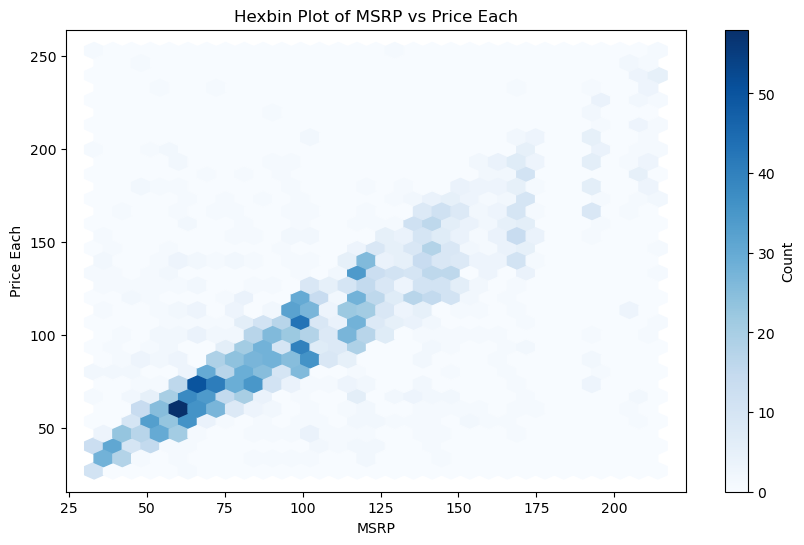

In [15]:
# Hexbin plot for MSRP vs PRICEEACH
plt.figure(figsize=(10, 6))
plt.hexbin(df['MSRP'], df['PRICEEACH'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin Plot of MSRP vs Price Each')
plt.xlabel('MSRP')
plt.ylabel('Price Each')
plt.show()

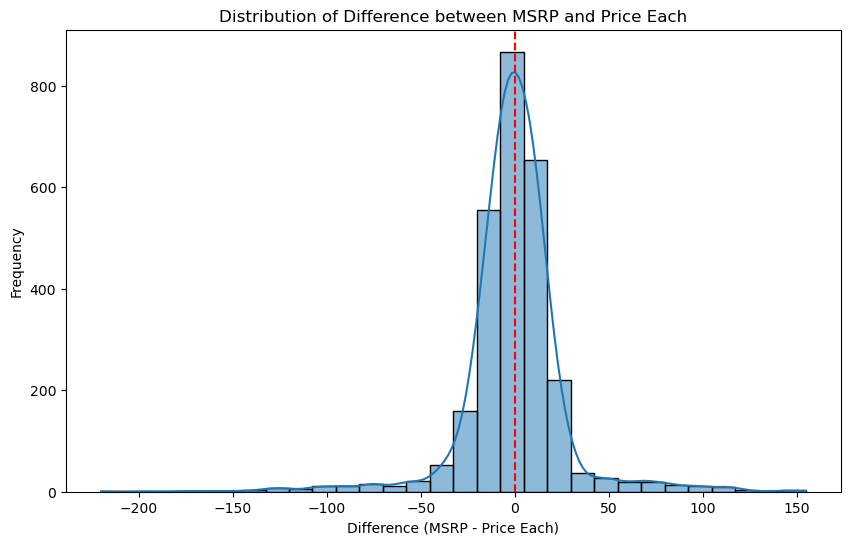

In [16]:
df['MSRP_vs_PRICEEACH'] = df['MSRP'] - df['PRICEEACH']

plt.figure(figsize=(10, 6))
sns.histplot(df['MSRP_vs_PRICEEACH'], bins=30, kde=True)
plt.title('Distribution of Difference between MSRP and Price Each')
plt.xlabel('Difference (MSRP - Price Each)')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()

In [17]:

# Count the number of times MSRP is higher, lower, or equal to PRICEEACH
higher_count = (df['MSRP_vs_PRICEEACH'] > 0).sum()
lower_count = (df['MSRP_vs_PRICEEACH'] < 0).sum()
equal_count = (df['MSRP_vs_PRICEEACH'] == 0).sum()

print(f'MSRP is higher than Price Each: {higher_count} times')
print(f'MSRP is lower than Price Each: {lower_count} times')
print(f'MSRP is equal to Price Each: {equal_count} times')

MSRP is higher than Price Each: 1346 times
MSRP is lower than Price Each: 1398 times
MSRP is equal to Price Each: 3 times


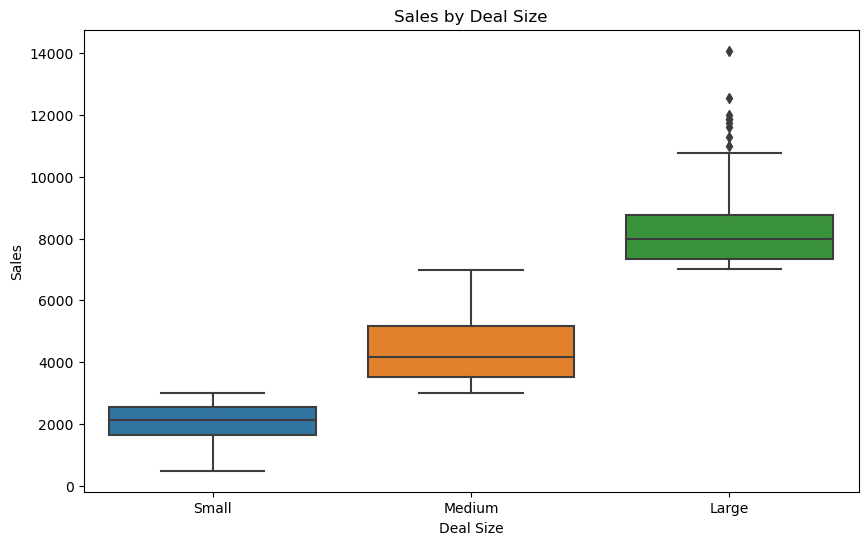

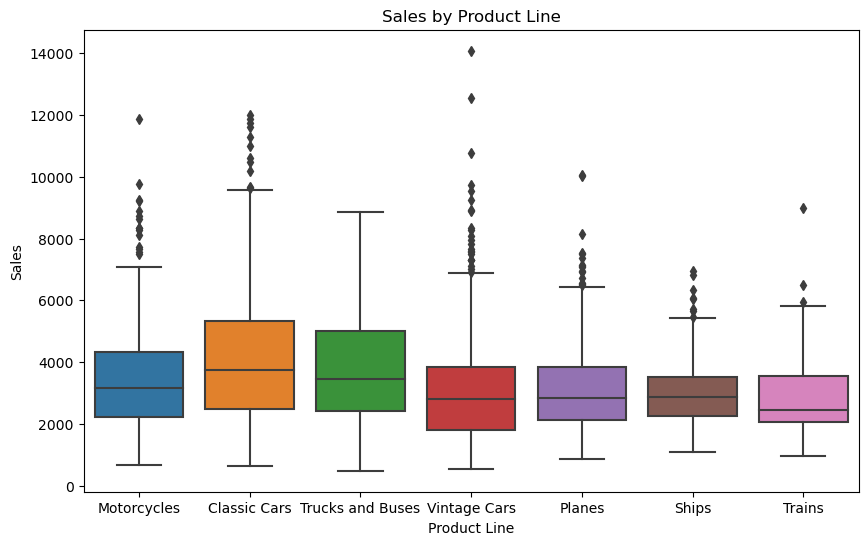

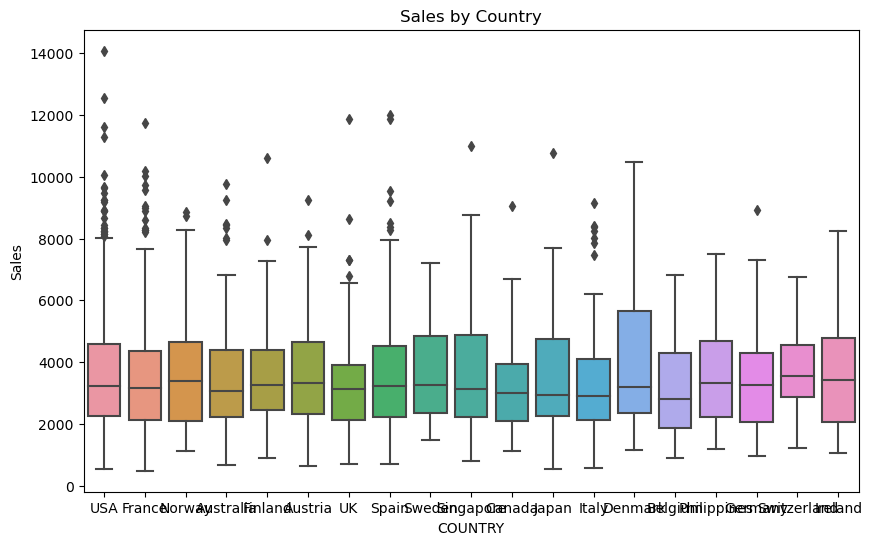

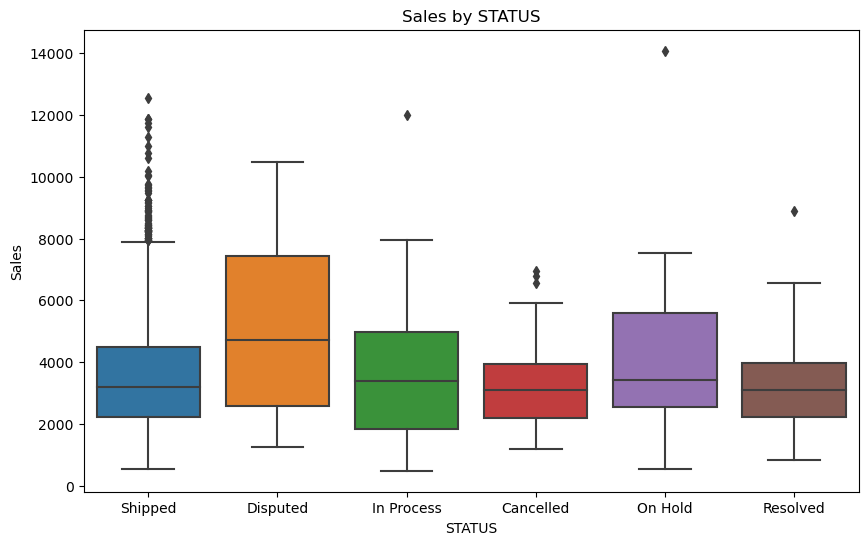

In [18]:
# Sales vs. Deal Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.title('Sales by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Sales')
plt.show()

# Sales vs. Product Line
plt.figure(figsize=(10, 6))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df)
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.show()

# Sales vs. Product Line
plt.figure(figsize=(10, 6))
sns.boxplot(x='COUNTRY', y='SALES', data=df)
plt.title('Sales by Country')
plt.xlabel('COUNTRY')
plt.ylabel('Sales')
plt.show()

# Sales vs. Product Line
plt.figure(figsize=(10, 6))
sns.boxplot(x='STATUS', y='SALES', data=df)
plt.title('Sales by STATUS')
plt.xlabel('STATUS')
plt.ylabel('Sales')
plt.show()

Cross-tabulation of Product Line by Status:
STATUS            Cancelled  Disputed  In Process  On Hold  Resolved  Shipped
PRODUCTLINE                                                                  
Classic Cars             16         3          14       12         8      896
Motorcycles               0         6           0        1         0      306
Planes                   12         2           0        9        12      269
Ships                    18         1           0        8        12      191
Trains                    1         0           0        1         0       75
Trucks and Buses          0         0          11        4         5      275
Vintage Cars             13         2          16        9        10      529


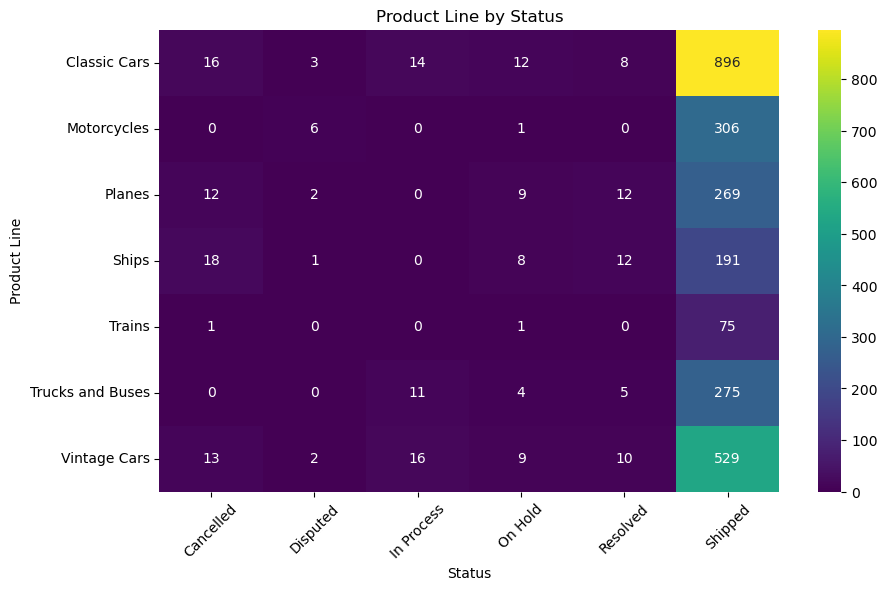

In [19]:
cross_tab = pd.crosstab(df['PRODUCTLINE'], df['STATUS'])

# Display the cross-tabulation
print("Cross-tabulation of Product Line by Status:")
print(cross_tab)

# Optionally, visualize the cross-tabulation
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d')
plt.title('Product Line by Status')
plt.xlabel('Status')
plt.ylabel('Product Line')
plt.xticks(rotation=45)
plt.show()

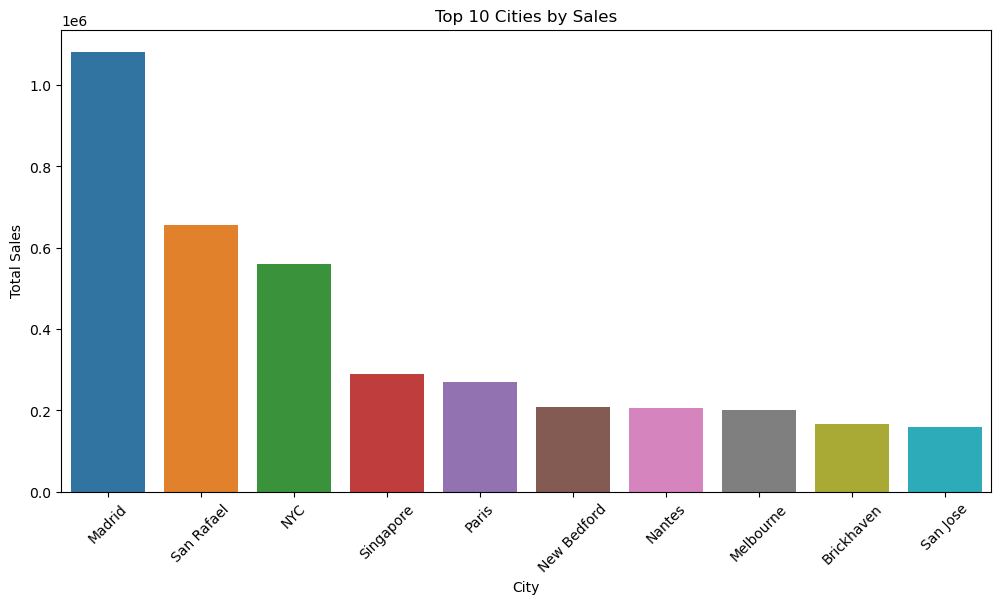

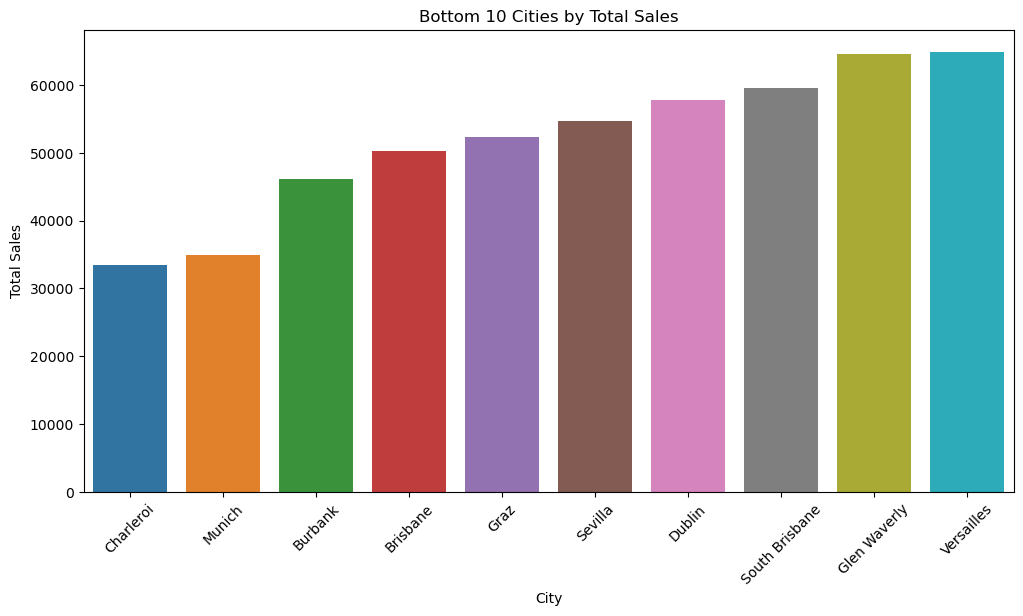

In [20]:
# Calculate total sales by city
sales_by_city = df.groupby('CITY')['SALES'].sum().sort_values(ascending=False)

# Identify the top cities by sales
top_cities = sales_by_city.head(10).index

# Filter the DataFrame to include only the top cities
top_cities_df = df[df['CITY'].isin(top_cities)]

# Get the sales amounts for the top cities
sales_amounts = sales_by_city.head(10)

# Plot the top cities by sales
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_amounts.index, y=sales_amounts.values)
plt.title('Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Calculate total sales by city
sales_by_city = df.groupby('CITY')['SALES'].sum().sort_values()

# Identify the bottom 10 cities by total sales
bottom_cities = sales_by_city.head(10).index

# Filter the DataFrame to include only the bottom cities
bottom_cities_df = df[df['CITY'].isin(bottom_cities)]

# Get the total sales for the bottom cities
sales_amounts_bottom = sales_by_city.head(10)

# Plot the bottom cities by total sales
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_amounts_bottom.index, y=sales_amounts_bottom.values)
plt.title('Bottom 10 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [21]:
df.corr()

C:\Users\abdul\AppData\Local\Temp\ipykernel_22876\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP,MSRP_vs_PRICEEACH
ORDERNUMBER,1.0,0.1,-0.0,-0.1,0.0,1.0,-0.3,-0.0,-0.0
QUANTITYORDERED,0.1,1.0,0.0,-0.0,0.6,0.1,-0.0,0.0,0.0
PRICEEACH,-0.0,0.0,1.0,-0.1,0.8,-0.0,-0.4,0.8,-0.4
ORDERLINENUMBER,-0.1,-0.0,-0.1,1.0,-0.1,-0.0,0.0,-0.0,0.1
SALES,0.0,0.6,0.8,-0.1,1.0,0.0,-0.3,0.6,-0.3
ORDERDATE,1.0,0.1,-0.0,-0.0,0.0,1.0,-0.3,-0.0,-0.0
DAYS_SINCE_LASTORDER,-0.3,-0.0,-0.4,0.0,-0.3,-0.3,1.0,-0.5,-0.2
MSRP,-0.0,0.0,0.8,-0.0,0.6,-0.0,-0.5,1.0,0.3
MSRP_vs_PRICEEACH,-0.0,0.0,-0.4,0.1,-0.3,-0.0,-0.2,0.3,1.0


C:\Users\abdul\AppData\Local\Temp\ipykernel_22876\2557730332.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


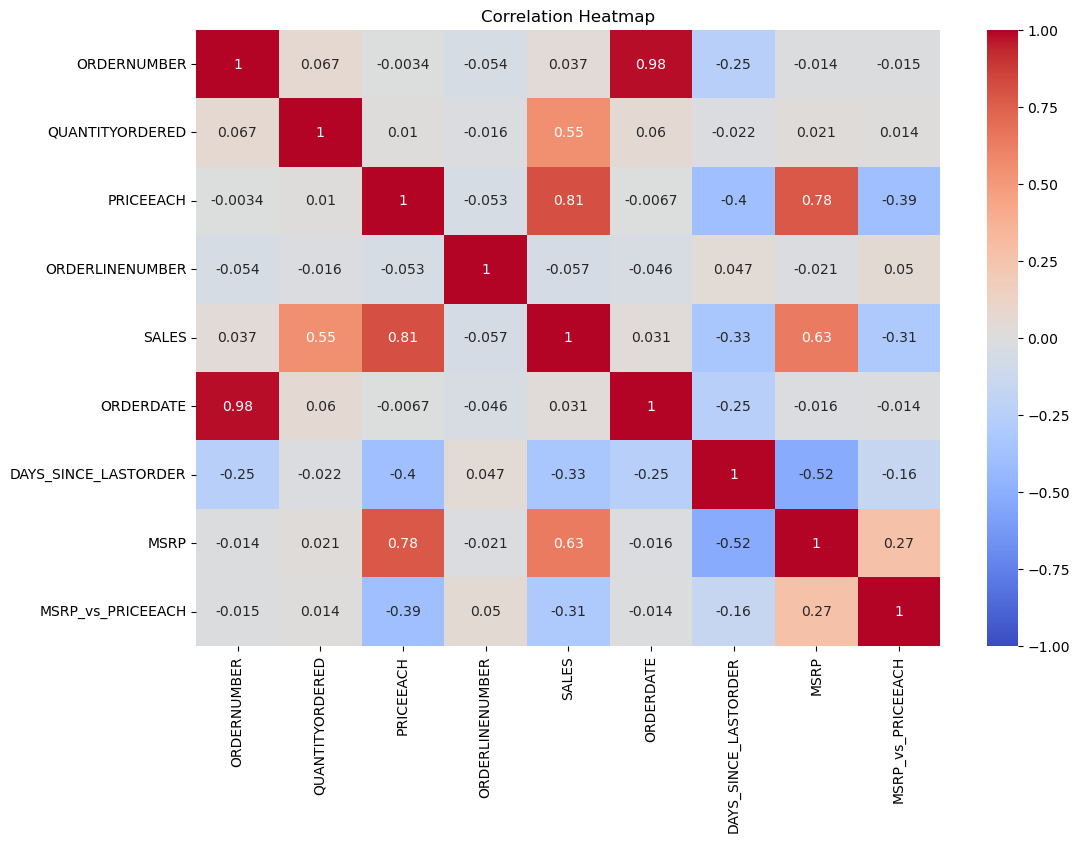

In [22]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

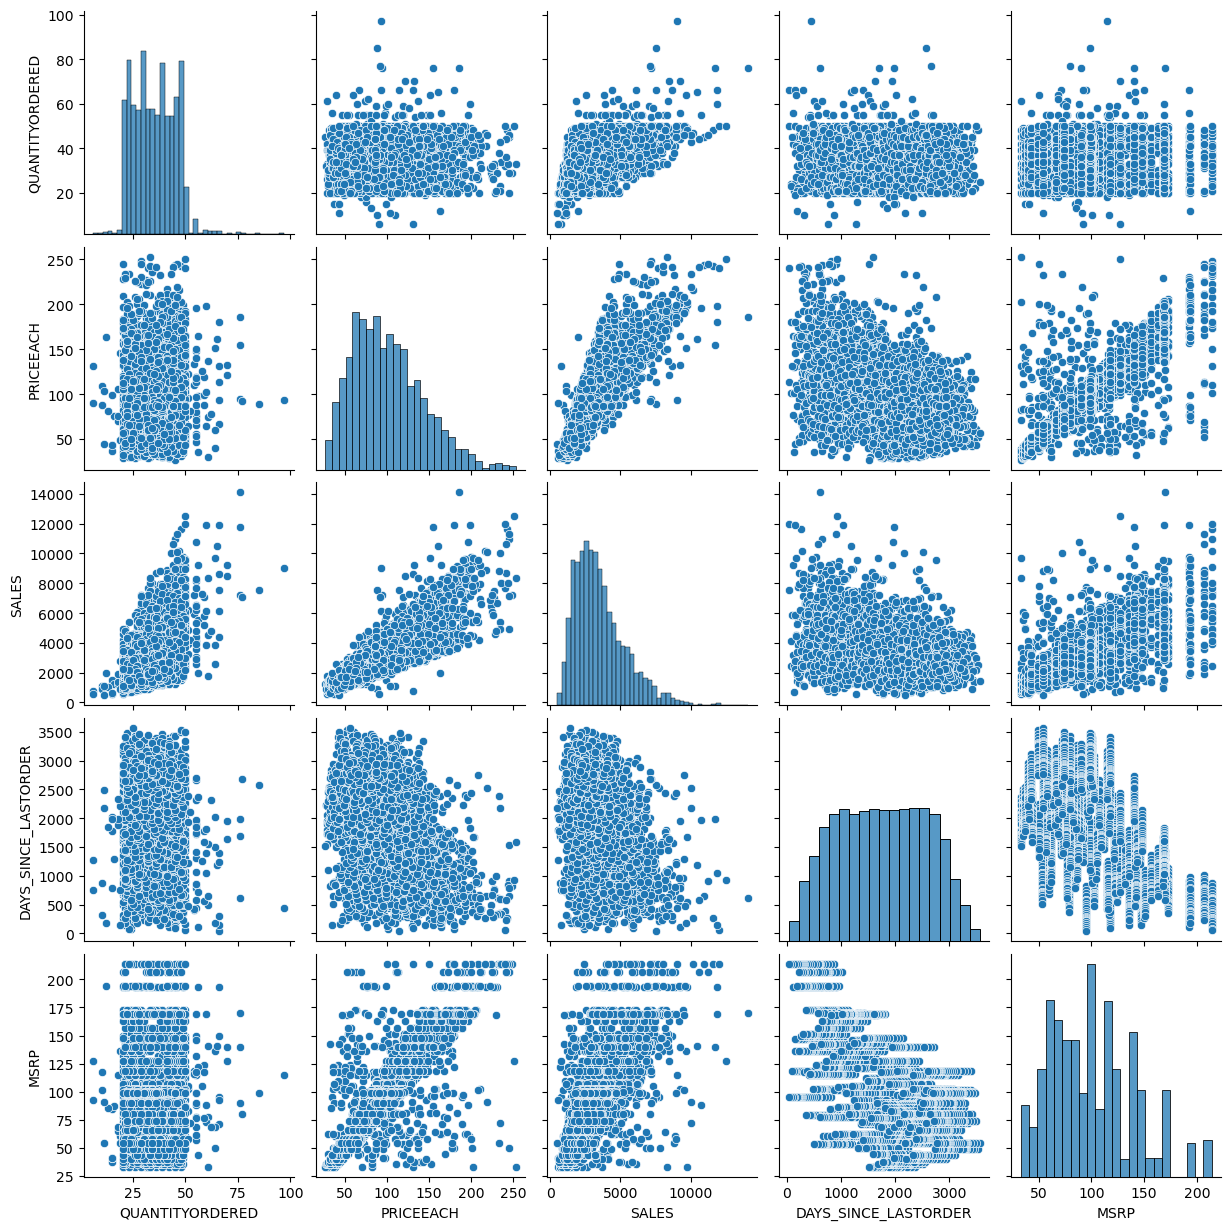

In [23]:
# Pair plot for numeric columns
sns.pairplot(df[numeric_cols])
plt.show()

In [24]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], origin='1899-12-30', unit='D')


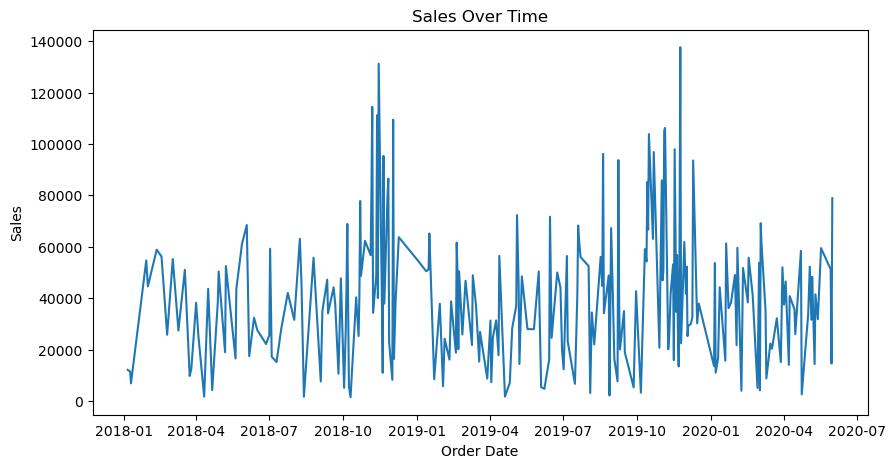

In [25]:

# Aggregate sales by order date
sales_over_time = df.groupby('ORDERDATE')['SALES'].sum().reset_index()

# Line plot for sales over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_over_time, x='ORDERDATE', y='SALES')
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

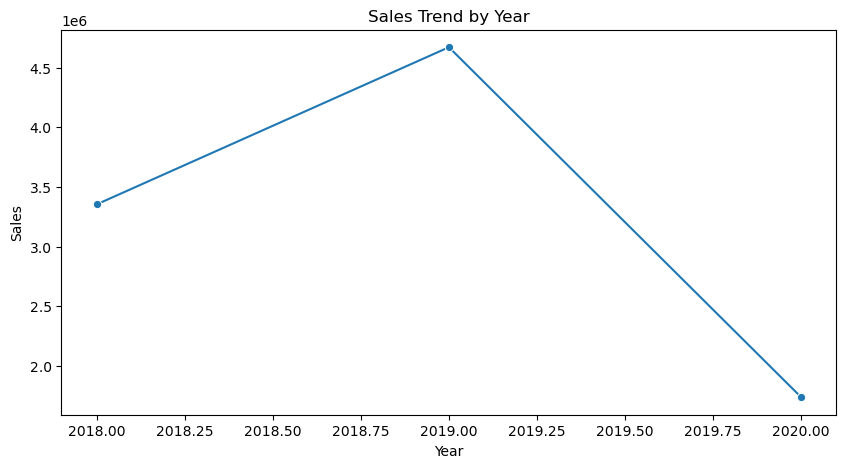

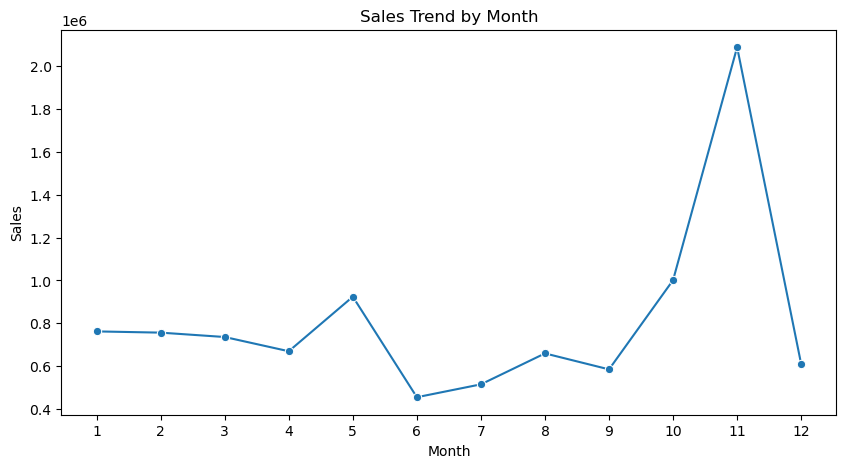

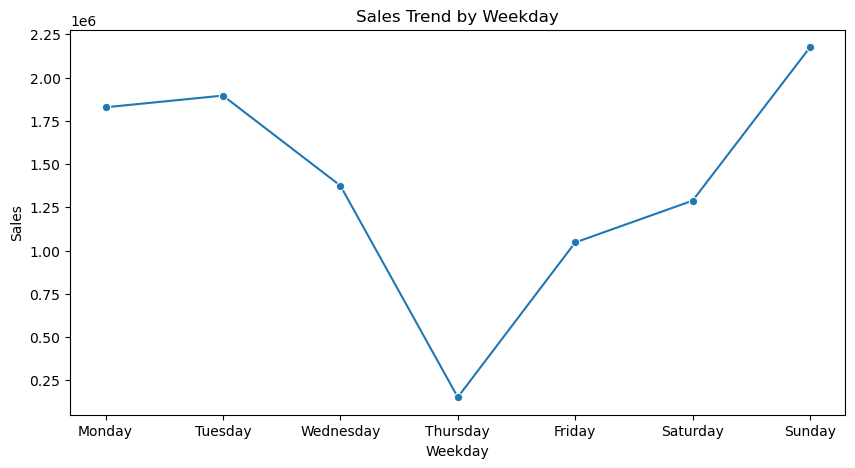

In [26]:
# Extract year, month, and weekday from ORDERDATE
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Weekday'] = df['ORDERDATE'].dt.weekday

# Aggregate sales by year, month, and weekday
sales_by_year = df.groupby('Year')['SALES'].sum().reset_index()
sales_by_month = df.groupby('Month')['SALES'].sum().reset_index()
sales_by_weekday = df.groupby('Weekday')['SALES'].sum().reset_index()

# Plot sales trends by year
plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_by_year, x='Year', y='SALES', marker='o')
plt.title('Sales Trend by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

# Plot sales trends by month
plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_by_month, x='Month', y='SALES', marker='o')
plt.title('Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1, 13))
plt.show()

# Plot sales trends by weekday
plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_by_weekday, x='Weekday', y='SALES', marker='o')
plt.title('Sales Trend by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Sales')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

In [27]:
df['ORDERDATE'] 

0      2018-02-24
1      2018-05-07
2      2018-07-01
3      2018-08-25
4      2018-10-28
          ...    
2742   2019-12-02
2743   2020-01-31
2744   2020-03-01
2745   2020-03-28
2746   2020-05-06
Name: ORDERDATE, Length: 2747, dtype: datetime64[ns]

In [28]:
df1=pd.read_excel('MRA+project1+AbdulKhaliq.xlsx')

C:\Users\abdul\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [29]:
df1.head()

,CUSTOMERNAME,Frequency,Monetary,Recency,Frequency [Binned],Monetary [Binned],Recency [Binned],Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Customer_Segment
0,"AV Stores, Co.",3,157807.8,421,Bin 2,Bin 4,Bin 3,2,2,4,224,Losing Customer
1,Alpha Cognac,3,70488.4,675,Bin 2,Bin 1,Bin 4,1,2,1,121,Evasive Customer
2,Amica Models & Co.,2,94117.3,328,Bin 1,Bin 3,Bin 2,3,1,3,313,Late Bloomer
3,"Anna's Decorations, Ltd",4,153996.1,131,Bin 4,Bin 4,Bin 1,4,4,4,444,Platinum Customer
4,Atelier graphique,3,24180.0,312,Bin 2,Bin 1,Bin 2,3,2,1,321,Late Bloomer


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CUSTOMERNAME        89 non-null     object 
 1   Frequency           89 non-null     int64  
 2   Monetary            89 non-null     float64
 3   Recency             89 non-null     int64  
 4   Frequency [Binned]  89 non-null     object 
 5   Monetary [Binned]   89 non-null     object 
 6   Recency [Binned]    89 non-null     object 
 7   Recency_Score       89 non-null     int64  
 8   Frequency_Score     89 non-null     int64  
 9   Monetary_Score      89 non-null     int64  
 10  RFM_Score           89 non-null     int64  
 11  Customer_Segment    89 non-null     object 
dtypes: float64(1), int64(6), object(5)
memory usage: 8.5+ KB


In [31]:
from tabulate import tabulate

# Filter for best customers (Platinum Customers) and select relevant columns
best_customers = df1[df1['Customer_Segment'] == 'Platinum Customer'].head(5)[['CUSTOMERNAME', 'Recency_Score', 'Frequency_Score', 'Monetary_Score']]

# Print the details of best customers as a table
print("Best Customers:")
print(tabulate(best_customers, headers='keys', tablefmt='pretty'))


Best Customers:
+----+----------------------------+---------------+-----------------+----------------+
|    |        CUSTOMERNAME        | Recency_Score | Frequency_Score | Monetary_Score |
+----+----------------------------+---------------+-----------------+----------------+
| 3  |  Anna's Decorations, Ltd   |       4       |        4        |       4        |
| 6  | Australian Collectors, Co. |       4       |        4        |       4        |
| 27 |   Diecast Classics Inc.    |       4       |        4        |       4        |
| 32 |   Euro Shopping Channel    |       4       |        4        |       4        |
| 43 |     La Rochelle Gifts      |       4       |        4        |       4        |
+----+----------------------------+---------------+-----------------+----------------+


In [32]:
# Filter for customers on the verge of churning and select relevant columns
churning_customers = df1[df1['Customer_Segment'] == 'Almost Lost Customer'].head(5)[['CUSTOMERNAME', 'Recency_Score', 'Frequency_Score', 'Monetary_Score']]

# Print the details of customers on the verge of churning as a table
print("\nCustomers on the Verge of Churning:")
print(tabulate(churning_customers, headers='keys', tablefmt='pretty'))


Customers on the Verge of Churning:
+----+----------------------------+---------------+-----------------+----------------+
|    |        CUSTOMERNAME        | Recency_Score | Frequency_Score | Monetary_Score |
+----+----------------------------+---------------+-----------------+----------------+
| 13 |    Blauer See Auto, Co.    |       1       |        4        |       2        |
| 15 |        CAF Imports         |       2       |        1        |       1        |
| 16 | Cambridge Collectables Co. |       2       |        1        |       1        |
| 25 |  Daedalus Designs Imports  |       2       |        1        |       1        |
| 30 |  Dragon Souveniers, Ltd.   |       1       |        4        |       4        |
+----+----------------------------+---------------+-----------------+----------------+


In [33]:
# Filter for lost customers and select relevant columns
lost_customers = df1[df1['Customer_Segment'] == 'Lost Customer'].head(5)[['CUSTOMERNAME', 'Recency_Score', 'Frequency_Score', 'Monetary_Score']]

# Print the details of lost customers as a table
print("\nLost Customers:")
print(tabulate(lost_customers, headers='keys', tablefmt='pretty'))


Lost Customers:
+----+------------------------------------+---------------+-----------------+----------------+
|    |            CUSTOMERNAME            | Recency_Score | Frequency_Score | Monetary_Score |
+----+------------------------------------+---------------+-----------------+----------------+
| 12 | Bavarian Collectables Imports, Co. |       1       |        1        |       1        |
| 20 |      Clover Collections, Co.       |       1       |        1        |       1        |
| 29 |   Double Decker Gift Stores, Ltd   |       1       |        1        |       1        |
| 40 |     Iberia Gift Imports, Corp.     |       1       |        1        |       1        |
| 70 |      Signal Collectibles Ltd.      |       1       |        1        |       1        |
+----+------------------------------------+---------------+-----------------+----------------+


In [34]:
# Filter for loyal customers (Very Loyal and Loyal) and select relevant columns
loyal_customers = df1[(df1['Customer_Segment'] == 'Very Loyal') | (df1['Customer_Segment'] == 'Loyal')].head(5)[['CUSTOMERNAME', 'Recency_Score', 'Frequency_Score', 'Monetary_Score']]

# Print the details of loyal customers as a table
print("\nLoyal Customers:")
print(tabulate(loyal_customers, headers='keys', tablefmt='pretty'))


Loyal Customers:
+----+-----------------------------+---------------+-----------------+----------------+
|    |        CUSTOMERNAME         | Recency_Score | Frequency_Score | Monetary_Score |
+----+-----------------------------+---------------+-----------------+----------------+
| 7  | Australian Gift Network, Co |       4       |        2        |       1        |
| 9  |      Auto Canal Petit       |       4       |        2        |       3        |
| 11 |     Baane Mini Imports      |       4       |        4        |       3        |
| 22 | Collectables For Less Inc.  |       4       |        2        |       2        |
| 33 |      FunGiftIdeas.com       |       4       |        2        |       3        |
+----+-----------------------------+---------------+-----------------+----------------+


In [35]:
df1['Customer_Segment'].value_counts()

Late Bloomer            14
Evasive Customer        13
Platinum Customer       11
Loyal                   11
Almost Lost Customer    11
High Risk Customer       9
Potential Customer       7
Losing Customer          6
Lost Customer            5
Very Loyal               1
Recent Customer          1
Name: Customer_Segment, dtype: int64

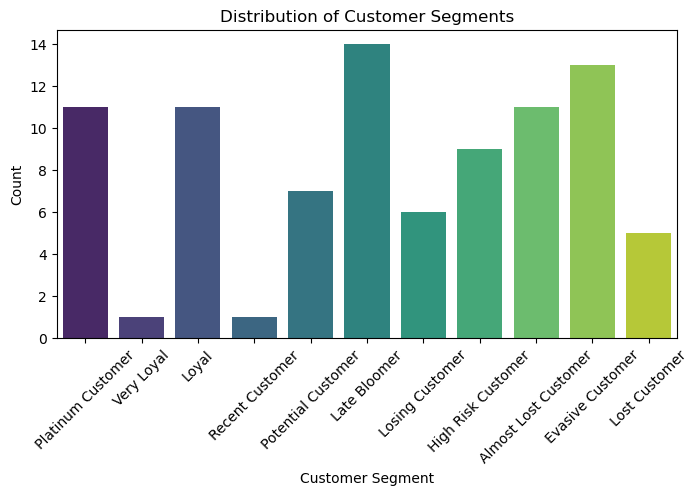

In [36]:
# Sort the DataFrame by RFM_Score in descending order
df_sorted = df1.sort_values(by='RFM_Score', ascending=False)

# Plot the distribution of Customer_Segment sorted by RFM_Score
plt.figure(figsize=(8, 4))
sns.countplot(data=df_sorted, x='Customer_Segment', palette='viridis')
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Merge DataFrames based on CUSTOMERNAME
merged_df = pd.merge(df, df1, on='CUSTOMERNAME', how='inner')
merged_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,Monetary,Recency,Frequency [Binned],Monetary [Binned],Recency [Binned],Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Customer_Segment
0,10107,30,95.7,2,2871.0,2018-02-24,828,Shipped,Motorcycles,95,...,164069.4,216,Bin 4,Bin 4,Bin 1,4,4,4,444,Platinum Customer
1,10329,42,104.7,1,4396.1,2019-11-15,216,Shipped,Motorcycles,95,...,164069.4,216,Bin 4,Bin 4,Bin 1,4,4,4,444,Platinum Customer
2,10107,39,99.9,5,3896.5,2018-02-24,878,Shipped,Motorcycles,118,...,164069.4,216,Bin 4,Bin 4,Bin 1,4,4,4,444,Platinum Customer
3,10329,20,158.8,2,3176.0,2019-11-15,266,Shipped,Motorcycles,118,...,164069.4,216,Bin 4,Bin 4,Bin 1,4,4,4,444,Platinum Customer
4,10107,27,224.7,4,6065.6,2018-02-24,902,Shipped,Motorcycles,193,...,164069.4,216,Bin 4,Bin 4,Bin 1,4,4,4,444,Platinum Customer


In [38]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747 entries, 0 to 2746
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

Cities with low RFM scores:
CITY
NYC              103
Singapore         79
Manchester        51
Bergamo           48
Madrid            45
Philadelphia      44
Lyon              41
Reggio Emilia     39
London            38
Boras             38
Cambridge         38
Kobenhavn         36
New Bedford       35
Gensve            31
Helsinki          30
Pasadena          30
Espoo             30
Bergen            29
Las Vegas         29
Aaarhus           27
dtype: int64


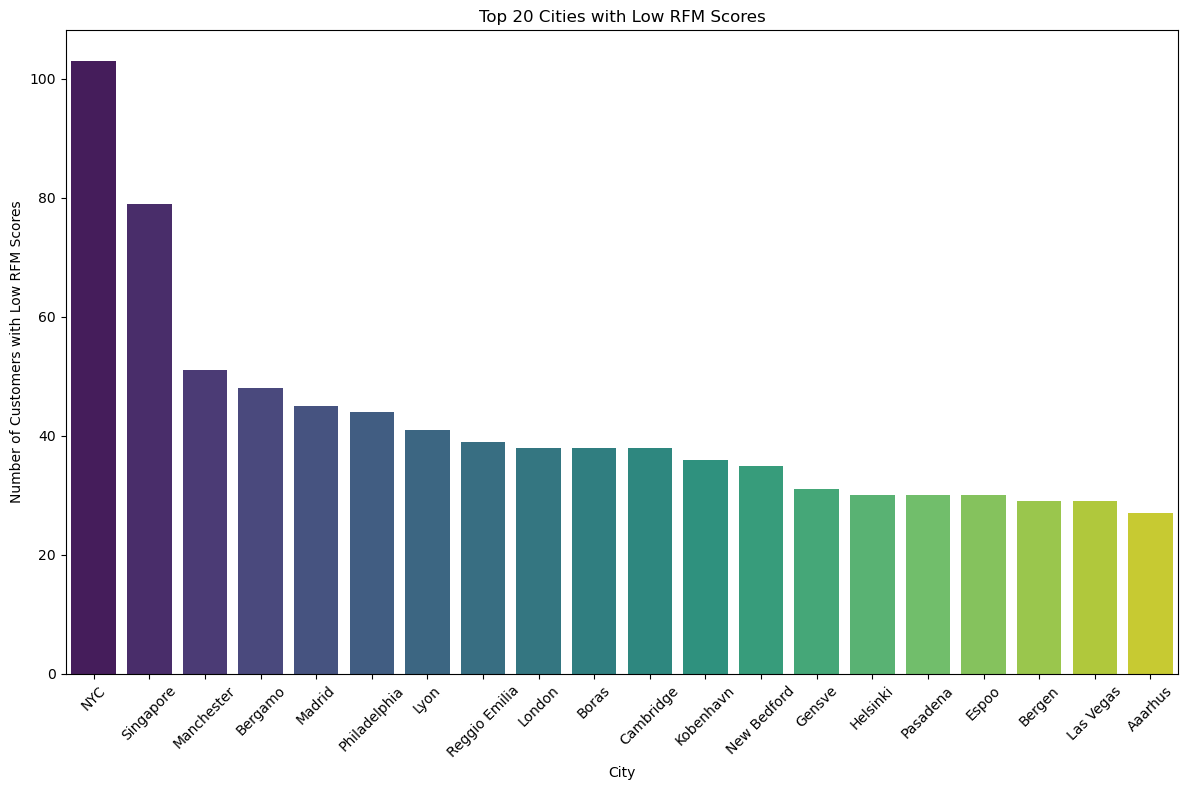

In [39]:

# Define a threshold for low RFM scores
rfm_threshold = 333  # 

# Filter data for customers with low RFM scores
low_rfm_customers = merged_df[merged_df['RFM_Score'] < rfm_threshold]

# Group by city and count the number of customers in each city
cities_with_low_rfm = low_rfm_customers.groupby('CITY').size().sort_values(ascending=False)

# Display cities with low RFM scores
print("Cities with low RFM scores:")
print(cities_with_low_rfm[:20])

plt.figure(figsize=(12, 8))
sns.barplot(x=cities_with_low_rfm[:20].index, y=cities_with_low_rfm[:20].values, palette='viridis')
plt.title('Top 20 Cities with Low RFM Scores')
plt.xlabel('City')
plt.ylabel('Number of Customers with Low RFM Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Cities with high RFM scores:
CITY
Madrid          259
San Rafael      180
Melbourne        55
Nantes           53
NYC              49
Paris            47
Chatswood        46
North Sydney     46
Reims            41
San Jose         40
Salzburg         40
Nashua           34
Burlingame       34
Oulu             32
Stavern          32
Minato-ku        32
Allentown        31
Liverpool        29
New Bedford      26
Boston           26
dtype: int64


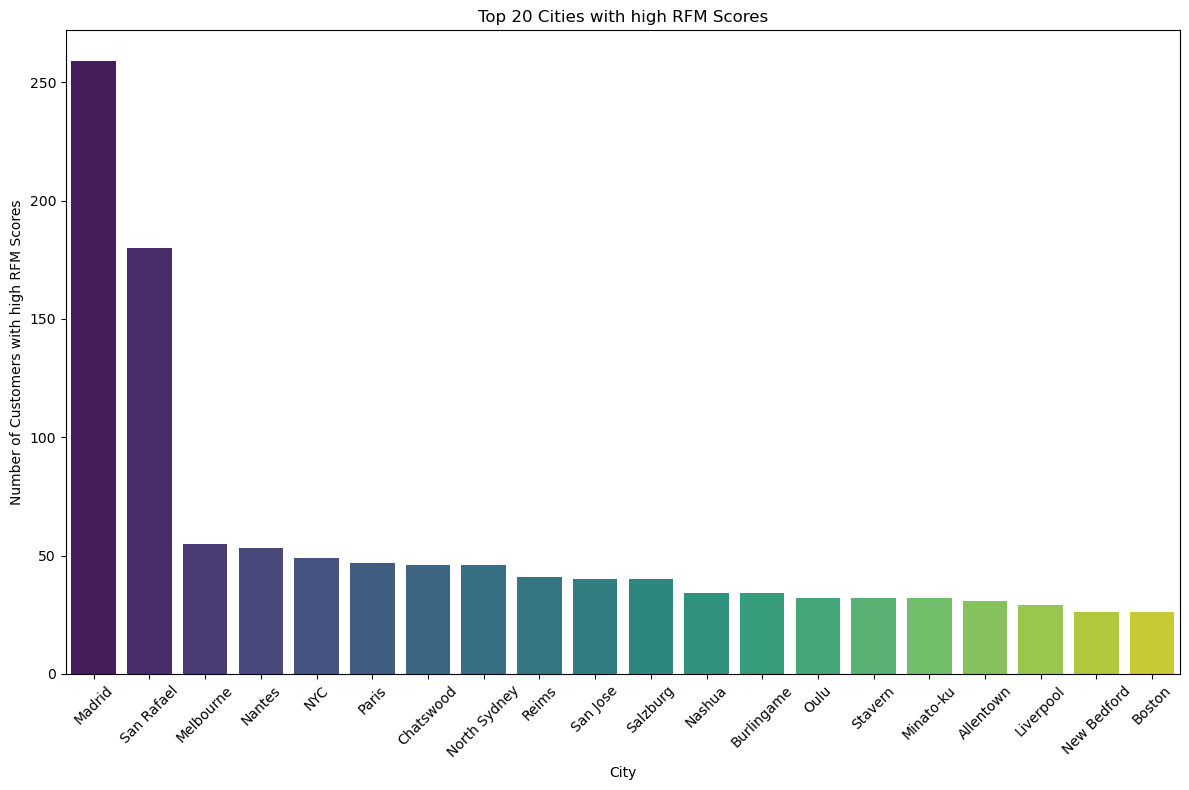

In [40]:

# Define a threshold for low RFM scores
rfm_threshold = 333  # 

# Filter data for customers with low RFM scores
high_rfm_customers = merged_df[merged_df['RFM_Score'] > rfm_threshold]

# Group by city and count the number of customers in each city
cities_with_high_rfm = high_rfm_customers.groupby('CITY').size().sort_values(ascending=False)

# Display cities with low RFM scores
print("Cities with high RFM scores:")
print(cities_with_high_rfm[:20])

plt.figure(figsize=(12, 8))
sns.barplot(x=cities_with_high_rfm[:20].index, y=cities_with_high_rfm[:20].values, palette='viridis')
plt.title('Top 20 Cities with high RFM Scores')
plt.xlabel('City')
plt.ylabel('Number of Customers with high RFM Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


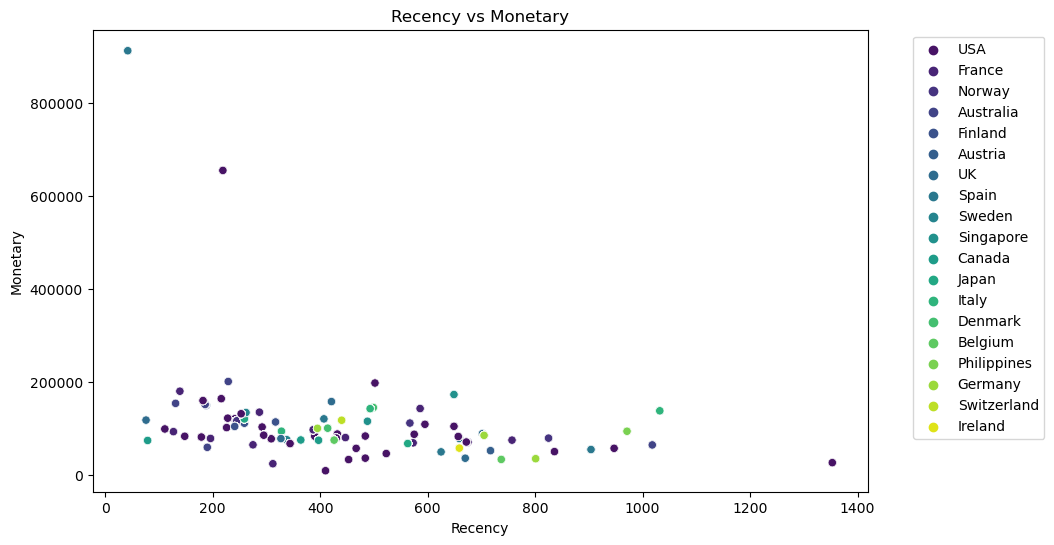

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Recency vs Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Recency', y='Monetary',hue='COUNTRY', palette='viridis')
plt.title('Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


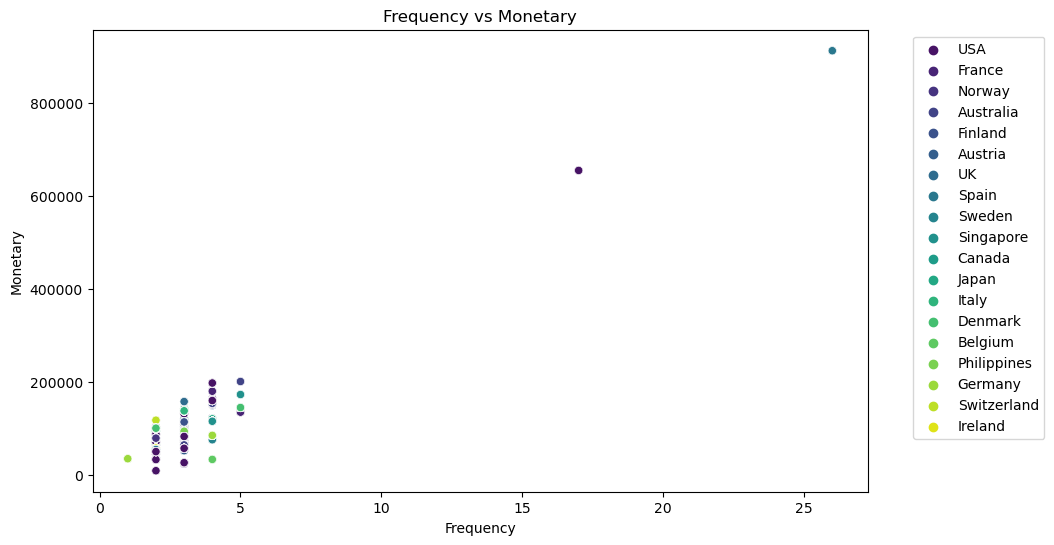

In [42]:
# Plot Frequency vs Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Frequency', y='Monetary', hue='COUNTRY', palette='viridis')
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


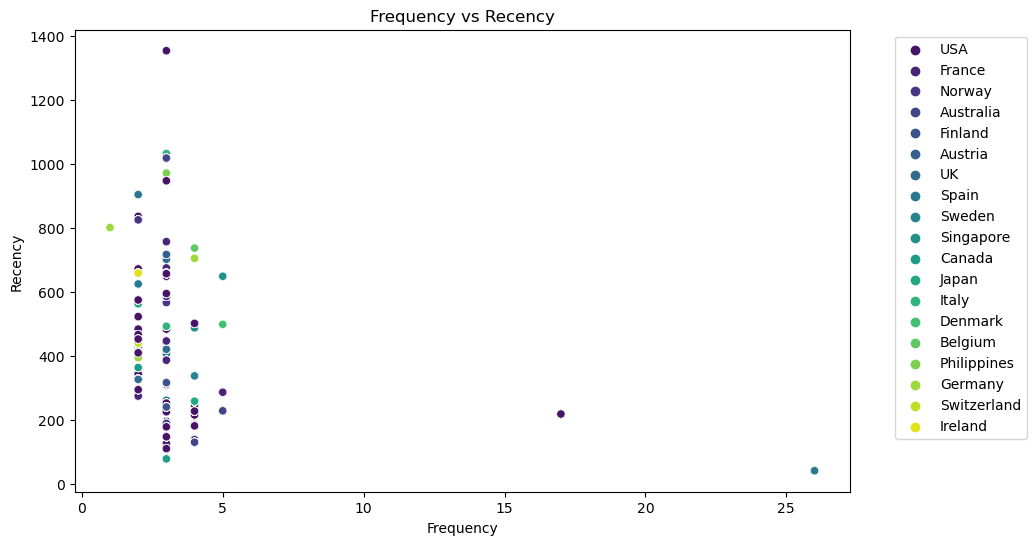

In [43]:
# Plot Frequency vs Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Frequency', y='Recency', hue='COUNTRY', palette='viridis')
plt.title('Frequency vs Recency')
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
